In [495]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Reading the data

In [498]:
train=pd.read_csv("C:/Users/P krishna sai moksha/Downloads/train.csv")
test=pd.read_csv("C:/Users/P krishna sai moksha/Downloads/test.csv")


In [500]:
train_original=train.copy()
test_original=test.copy()

In [502]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [504]:
test.columns

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [506]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [508]:
test.shape,train.shape

((367, 11), (614, 13))

In [510]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

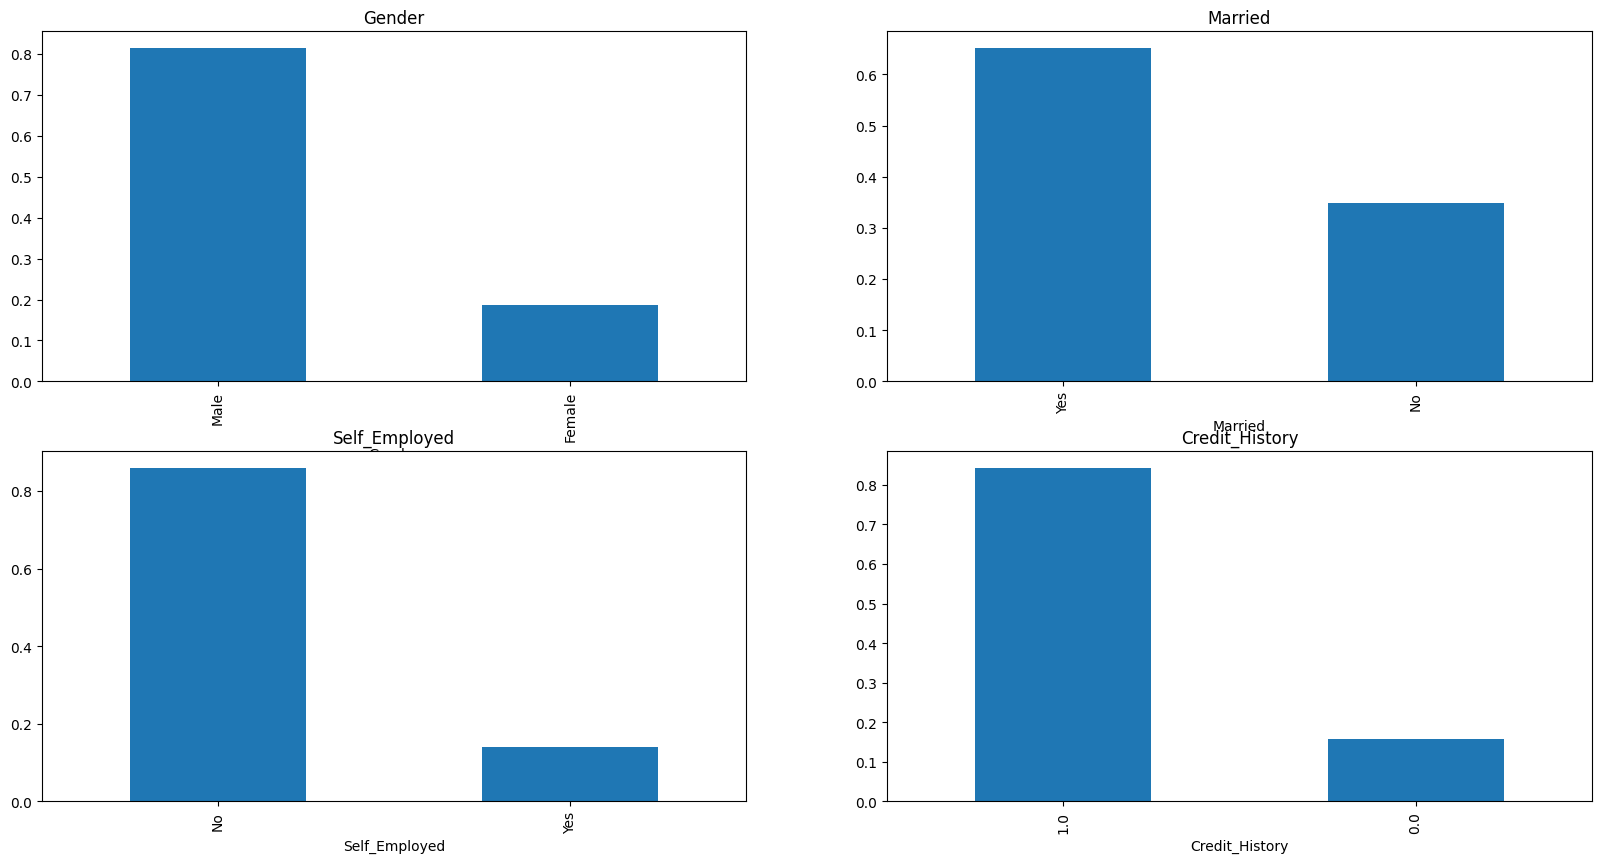

In [512]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

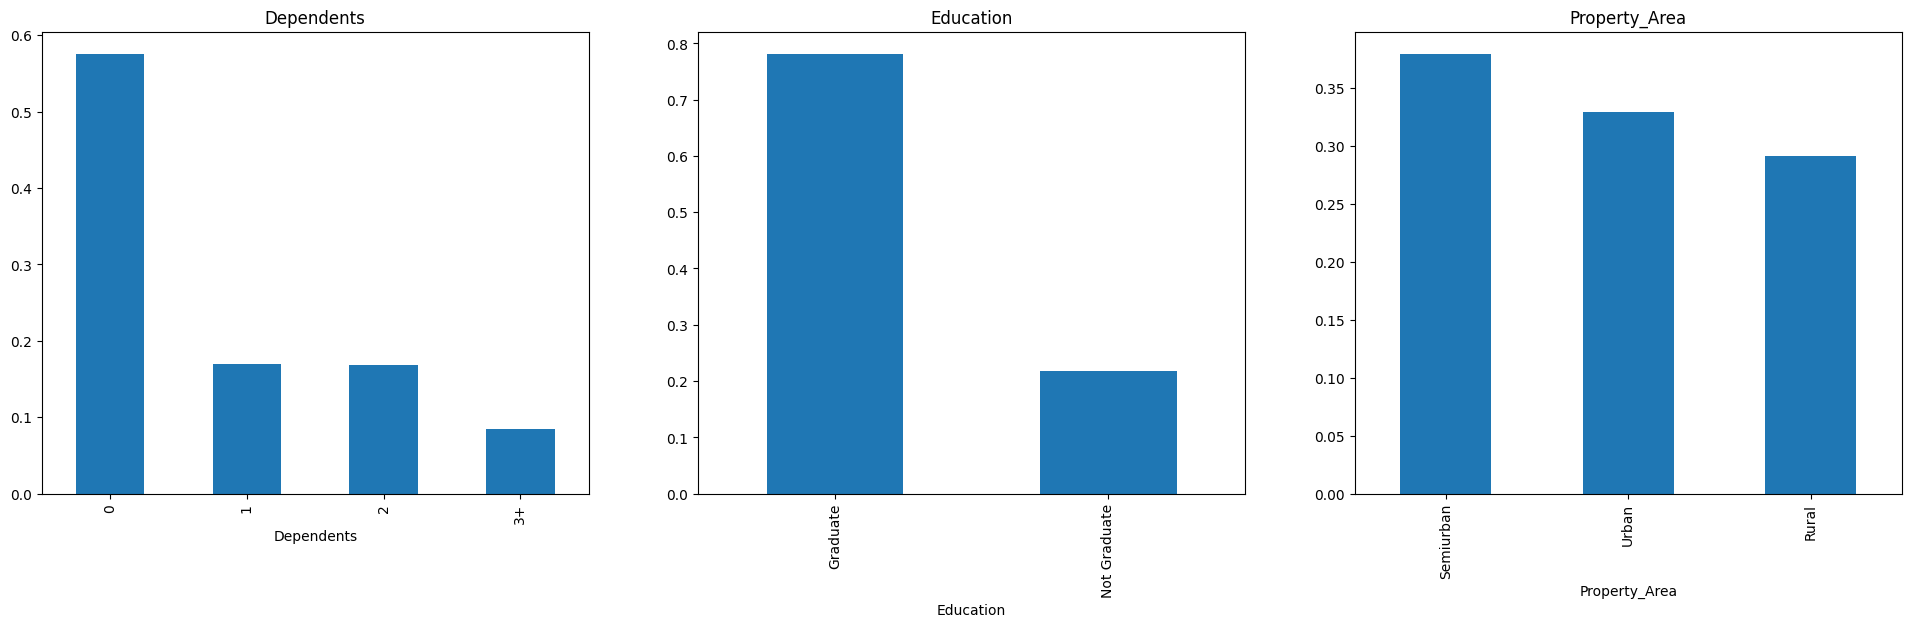

In [514]:

plt.figure(1, figsize=(24, 6))

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()


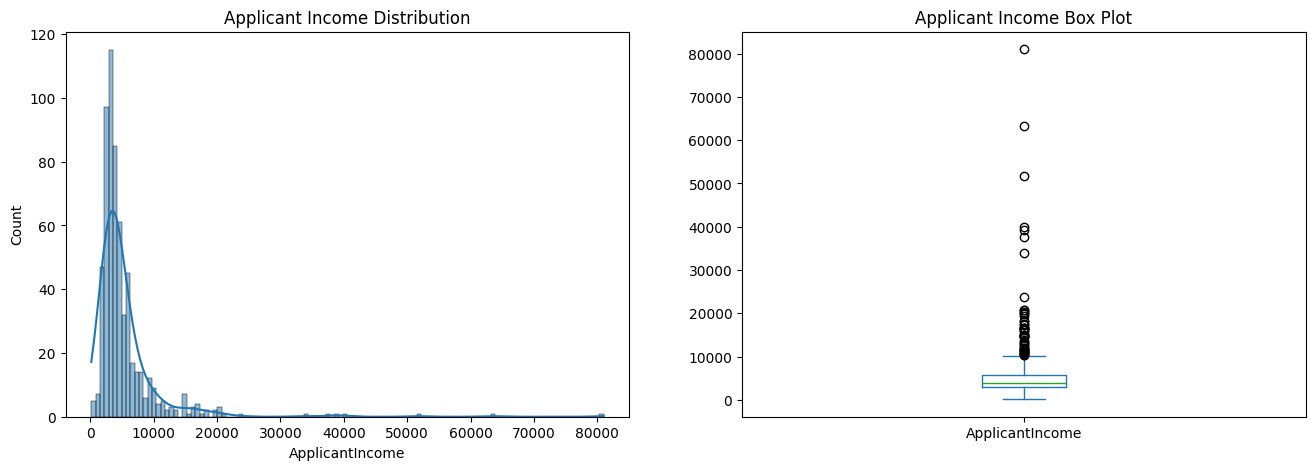

In [516]:
plt.figure(1, figsize=(16, 5))

plt.subplot(121)
sns.histplot(train['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')

plt.subplot(122)
train['ApplicantIncome'].plot.box()
plt.title('Applicant Income Box Plot')

plt.show()


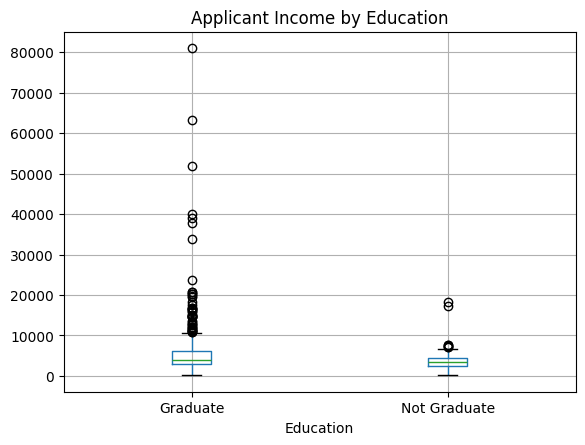

In [517]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")
plt.title('Applicant Income by Education')
plt.suptitle('')  # This line removes the default title
plt.show()


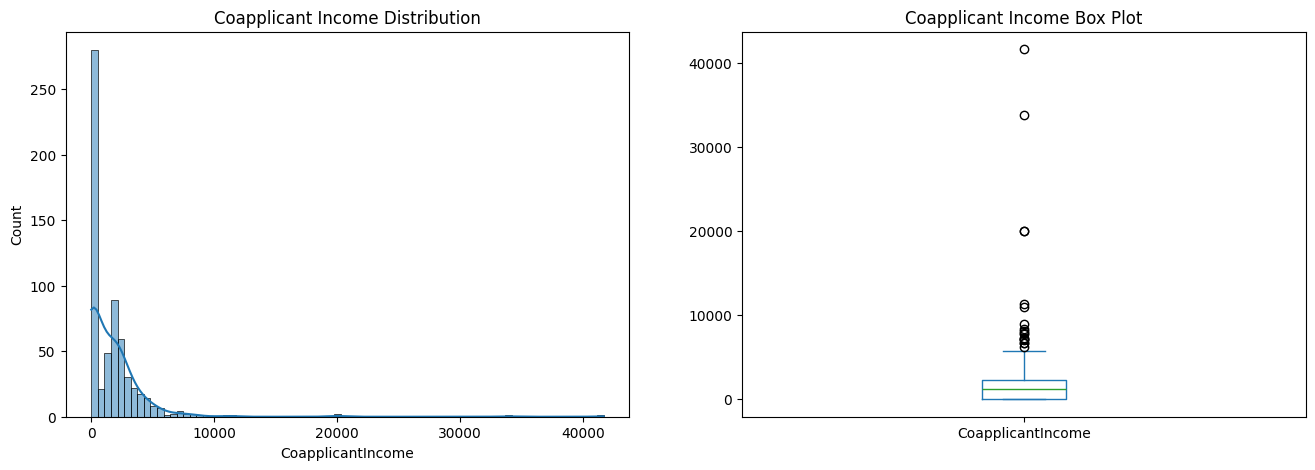

In [520]:
plt.figure(1, figsize=(16, 5))

plt.subplot(121)
sns.histplot(train['CoapplicantIncome'], kde=True)
plt.title('Coapplicant Income Distribution')

plt.subplot(122)
train['CoapplicantIncome'].plot.box()
plt.title('Coapplicant Income Box Plot')

plt.show()



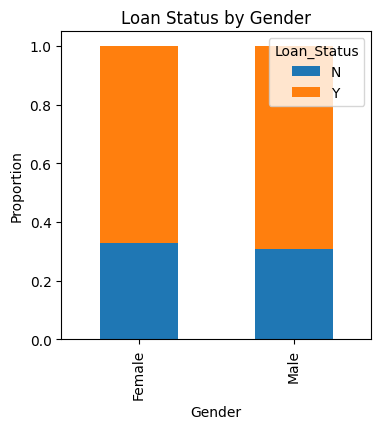

In [522]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()


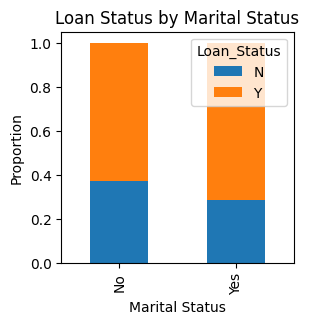

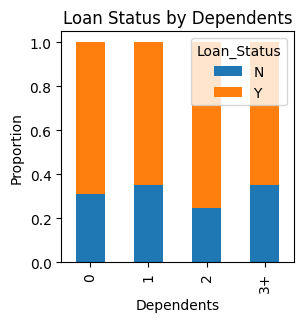

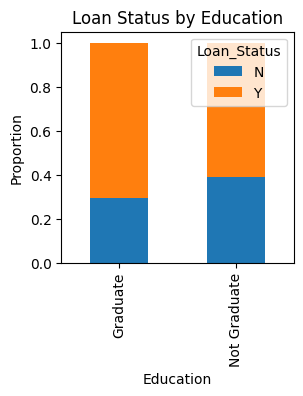

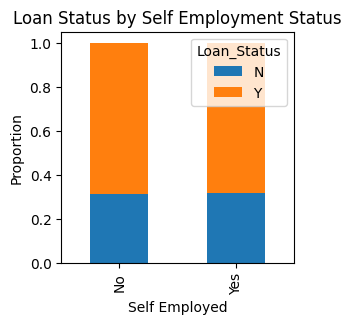

In [524]:
# Creating crosstabs
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

# Plotting stacked bar plots
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3, 3))
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3, 3))
plt.title('Loan Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Proportion')
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3, 3))
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3, 3))
plt.title('Loan Status by Self Employment Status')
plt.xlabel('Self Employed')
plt.ylabel('Proportion')
plt.show()


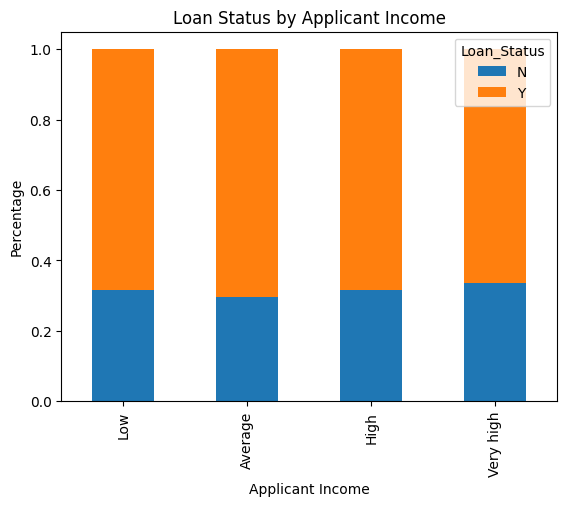

In [526]:
# Creating income bins
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

# Creating crosstab
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')
plt.title('Loan Status by Applicant Income')
plt.show()


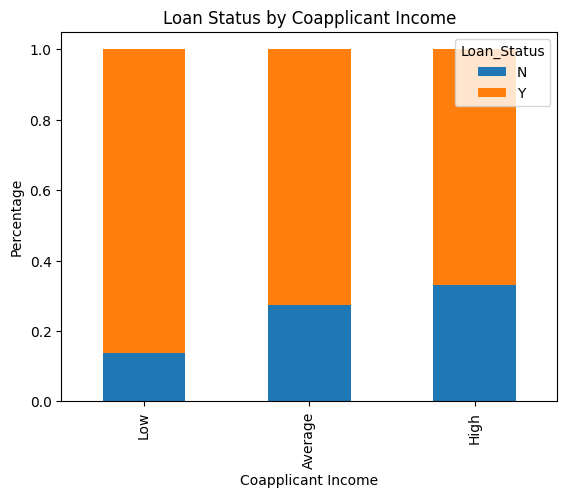

In [528]:
# Creating coapplicant income bins
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

# Creating crosstab
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')
plt.title('Loan Status by Coapplicant Income')
plt.show()


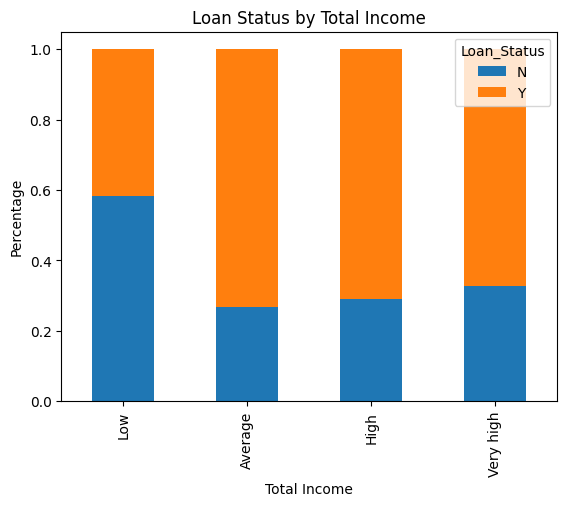

In [530]:
# Creating total income column
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Creating total income bins
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

# Creating crosstab
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.title('Loan Status by Total Income')
plt.show()


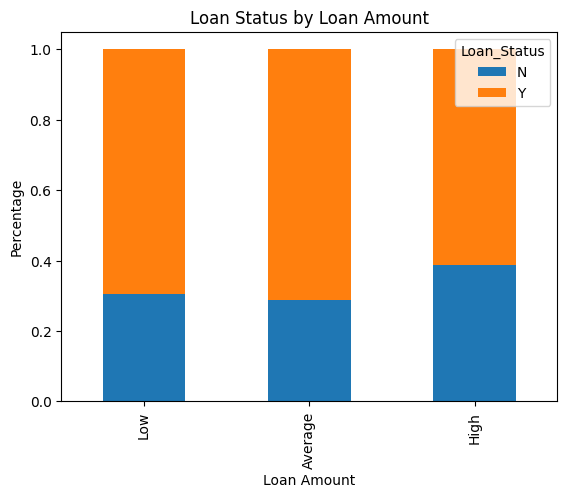

In [532]:
# Creating loan amount bins
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

# Creating crosstab
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.title('Loan Status by Loan Amount')
plt.show()


In [534]:
print(train.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')


In [536]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [540]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [542]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

# Encoding 'Loan_Status' column
train['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)


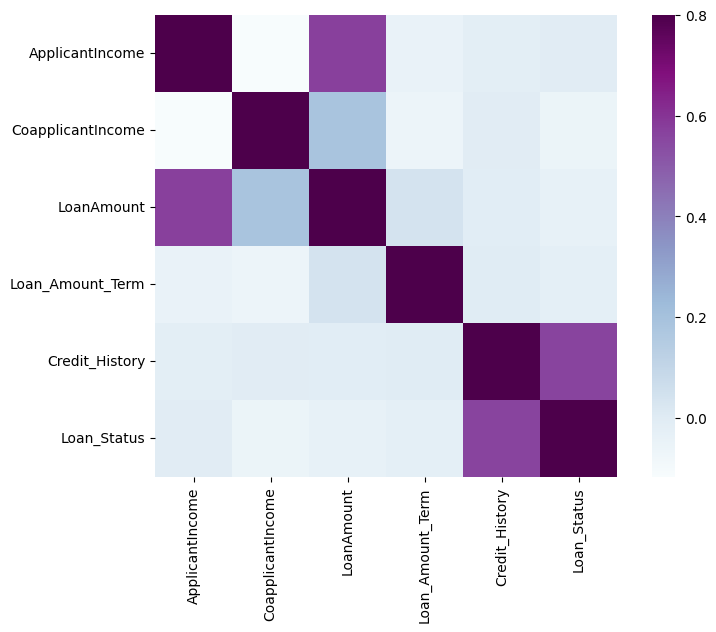

In [544]:
train_numeric = train.select_dtypes(include=[float, int])

# Calculating the correlation matrix
matrix = train_numeric.corr()

# Setting up the plot
f, ax = plt.subplots(figsize=(9, 6))

# Creating the heatmap
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

# Displaying the plot
plt.show()



In [546]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [548]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [550]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [552]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [554]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [556]:
# Fill missing values in the test dataset
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [558]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [560]:
# Dropping the 'Loan_ID' column from both DataFrames
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)


In [562]:
# Separating features and target variable
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']


In [564]:
# Converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)


### Logistic regression

In [566]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [568]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8

In [570]:
# Ensure the test dataset has the same columns as the training dataset
test = test.reindex(columns=train.columns.drop('Loan_Status'), fill_value=0)

# Make predictions on the test dataset
pred_test = model.predict(test)


In [572]:
submission=pd.read_csv("C:/Users/P krishna sai moksha/OneDrive/Documents/sample_submission.csv")

In [574]:
a=submission['Loan_Status']=pred_test 
b=submission['Loan_ID']=test_original['Loan_ID']
print(a)


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [451]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [453]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [576]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [578]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1

pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7950819672131147


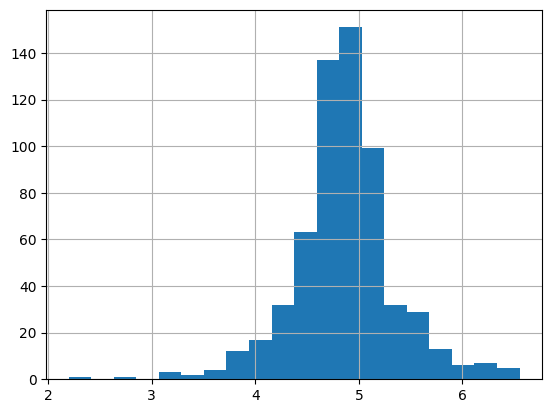

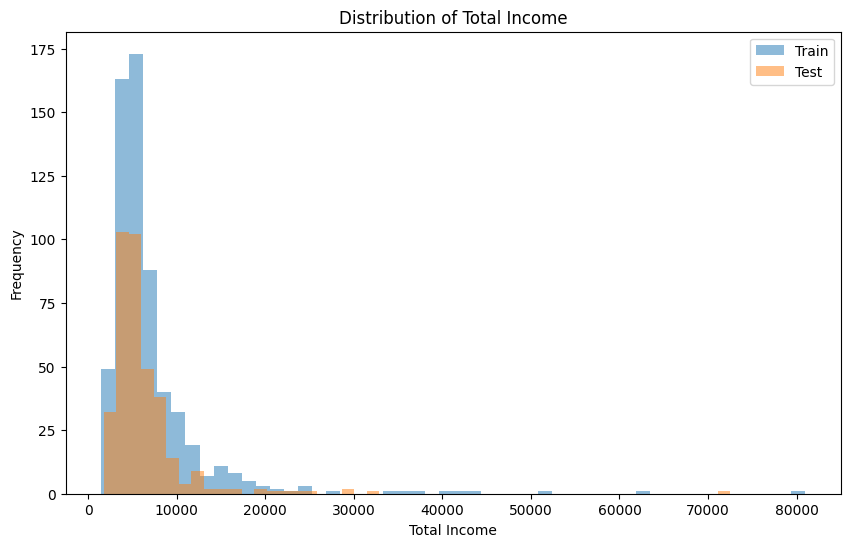

In [580]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Plot the distribution of Total_Income
plt.figure(figsize=(10, 6))
plt.hist(train['Total_Income'], bins=50, alpha=0.5, label='Train')
plt.hist(test['Total_Income'], bins=50, alpha=0.5, label='Test')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.legend(loc='upper right')
plt.show()


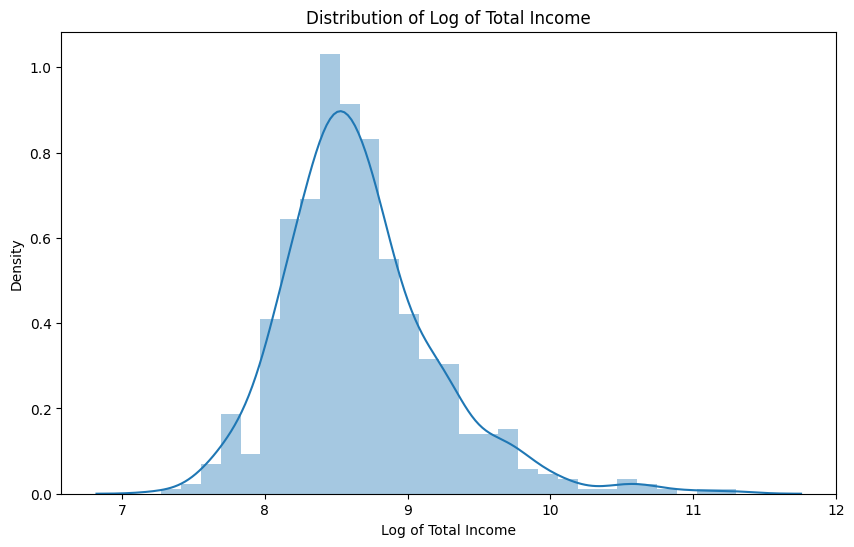

In [581]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Apply logarithmic transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

# Plot the distribution of Total_Income_log
plt.figure(figsize=(10, 6))
sns.distplot(train['Total_Income_log'])
plt.xlabel('Log of Total Income')
plt.ylabel('Density')
plt.title('Distribution of Log of Total Income')
plt.show()


In [584]:
# Calculate EMI for train and test datasets
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']


In [586]:
# Calculate Balance Income for train and test datasets
train['Balance Income'] = train['Total_Income'] - (train['EMI'] * 1000)  # Multiply with 1000 to make the units equal
test['Balance Income'] = test['Total_Income'] - (test['EMI'] * 1000)


In [588]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [590]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset
X.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,4.852030,False,True,True,False,False,True,False,False,...,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,False,True,False,True,False,False,True,False,...,False,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,False,True,False,True,False,True,False,False,...,False,False,True,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,False,True,False,True,False,True,False,False,...,True,True,False,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,False,True,True,False,False,True,False,False,...,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [592]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8029188324670132


In [594]:
score

0.7950819672131147

In [596]:
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID'] 
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
# Converting submission file to .csv format
submission.to_csv('Log2.csv', index=False)

## Decision Tree

In [598]:
from sklearn import tree
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy:  0.7149140343862455


In [600]:
score

0.6721311475409836

In [602]:
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID'] 
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
# Converting submission file to .csv format
submission.to_csv('Decision Tree.csv', index=False)

### Random Forest Classifier

In [604]:
from sklearn.ensemble import RandomForestClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.7723577235772358

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7540983606557377

Mean validation accuracy:  0.7849660135945622


In [608]:
score

0.7540983606557377